#### TASK 3 : NLP 
### Submission To MIDAS LAB
File Name : Step 5 -trying_LSTM 
<br>
@Author : Vansh Gupta
<br>
Objective : Finding performace of Neural Network(LSTM).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

using goole colab for faster GPU. File was uploaded on my drive and has been fetched here.

In [2]:
!wget https://www.dropbox.com/s/a68e2myvs15cfjs/data.zip?dl=0

--2021-04-07 11:03:57--  https://www.dropbox.com/s/a68e2myvs15cfjs/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/a68e2myvs15cfjs/data.zip [following]
--2021-04-07 11:03:57--  https://www.dropbox.com/s/raw/a68e2myvs15cfjs/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccfbff968c242a66103324dd5df.dl.dropboxusercontent.com/cd/0/inline/BMIzFgO5xpb3GPAXEPLkV4LySD9UdQFFULXRpKQ_PPrIVEjn7uKtOci0mIOWCMiYk7z-38KOtnzm9PrYRlFtjG7bmUDCYAoBtPHnpb77p9gj9_YT2-V-K4VAvsiu9HHWalPqHnk8o0B9f6tF5NzF9sKb/file# [following]
--2021-04-07 11:03:57--  https://uccfbff968c242a66103324dd5df.dl.dropboxusercontent.com/cd/0/inline/BMIzFgO5xpb3GPAXEPLkV4LySD9UdQFFULXRpKQ_PPrIVEjn7uKtOci0mIOWCMiYk7z-38KOtnzm9PrYRlFtjG7bmUDCYAoBt

In [3]:
!unzip data.zip?dl=0

Archive:  data.zip?dl=0
   creating: Data/
  inflating: Data/Done_with_Description.csv  
  inflating: Data/Done_with_Labels.csv  
  inflating: Data/flipkart_com-ecommerce_sample.xlsx  
  inflating: Data/Processed_data.csv  


In [4]:
df = pd.read_csv("Data/Done_with_Description.csv")

In [5]:
df.head()

,product_category_tree,description,cat_level1,cat_level2,cat_level3,cat_level4,cat_level5,cat_level6,cleaned_text
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing,Women's Clothing,Lingerie Sleep & Swimwear,Shorts,Alisha Shorts,NaN,feature alisha solid woman cycling short cotto...
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture,Living Room Furniture,Sofa Beds & Futons,NaN,NaN,NaN,fabhomedecor fabric double sofa finish color l...
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Women's Footwear,Ballerinas,NaN,NaN,NaN,feature belly sandal wedge heel casualsaw bell...
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing,Women's Clothing,Lingerie Sleep & Swimwear,Shorts,Alisha Shorts,NaN,feature alisha solid woman cycling short cotto...
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,NaN,NaN,specification sicons purpose arnica shampoo ge...


In [6]:
## droping rows where value of cat_level1 is na
df.dropna(subset=["cat_level1"], inplace=True)
X = df["cleaned_text"].values
y = df["cat_level1"].values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [7]:
print(X.shape, y.shape)

(19661,) (19661,)


In [8]:
print(len(onehot_encoded[0]))

28


Tokenization

In [18]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(
    num_words=MAX_NB_WORDS,
    filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
    lower=True,
)
tokenizer.fit_on_texts(df["description"].values)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

Found 30749 unique tokens.


Converting to sequence

In [19]:
X = tokenizer.texts_to_sequences(df["description"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print("Shape of data tensor:", X.shape)

Shape of data tensor: (19661, 250)


Converting labels to categorical

In [20]:
Y = pd.get_dummies(df["cat_level1"]).values
print("Shape of label tensor:", Y.shape)

Shape of label tensor: (19661, 28)


Test - Train Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.10, random_state=42
)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(17694, 250) (17694, 28)
(1967, 250) (1967, 28)


Model architecture

In [22]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(28, activation="softmax"))
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          1000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 28)                2828      
Total params: 1,083,228
Trainable params: 1,083,228
Non-trainable params: 0
_________________________________________________________________
None


Below Model was trained for 20 epoches . 2 times *10 epoch.<br> Best accuracy was given at epoch 12 with training accuracy of 97.82% and validation accuracy of 94.24%

In [24]:
epochs = 10
batch_size = 64

history = model.fit(
    X_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=3, min_delta=0.0001)
    ],
)

Epoch 1/10
249/249 [==============================] - 208s 837ms/step - loss: 0.1105 - accuracy: 0.9707 - val_loss: 0.2841 - val_accuracy: 0.9379
Epoch 2/10
249/249 [==============================] - 207s 831ms/step - loss: 0.0849 - accuracy: 0.9782 - val_loss: 0.2603 - val_accuracy: 0.9424
Epoch 3/10
249/249 [==============================] - 205s 825ms/step - loss: 0.0718 - accuracy: 0.9805 - val_loss: 0.2629 - val_accuracy: 0.9395
Epoch 4/10
249/249 [==============================] - 206s 828ms/step - loss: 0.0601 - accuracy: 0.9834 - val_loss: 0.2629 - val_accuracy: 0.9452
Epoch 5/10
249/249 [==============================] - 205s 822ms/step - loss: 0.0571 - accuracy: 0.9844 - val_loss: 0.2543 - val_accuracy: 0.9441
Epoch 6/10
249/249 [==============================] - 206s 827ms/step - loss: 0.0507 - accuracy: 0.9861 - val_loss: 0.2778 - val_accuracy: 0.9435
Epoch 7/10
249/249 [==============================] - 205s 821ms/step - loss: 0.0367 - accuracy: 0.9901 - val_loss: 0.2652 -

KeyboardInterrupt: ignored

In [25]:
accr = model.evaluate(X_test, Y_test)
print(
    "Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}".format(accr[0], accr[1])
)

62/62 [==============================] - 4s 57ms/step - loss: 0.2171 - accuracy: 0.9512
Test set
  Loss: 0.217
  Accuracy: 0.951


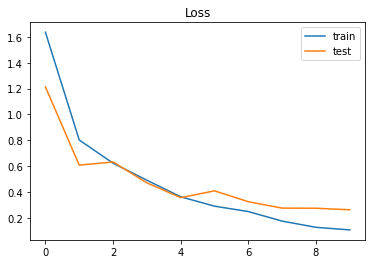

In [26]:
plt.title("Loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show();

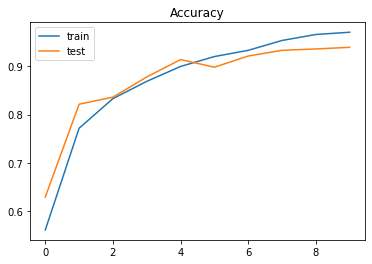

In [29]:
plt.title("Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="test")
plt.legend()
plt.show();